In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Input,Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras. metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
import itertools
%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
_classes = [
    'Sample001',
    'Sample002',
    'Sample003',
    'Sample004',
    'Sample005',
    'Sample006',
    'Sample007',
    'Sample008',
    'Sample009',
    'Sample010',
    'Sample011',
    'Sample012',
    'Sample013',
    'Sample014',
    'Sample015',
    'Sample016',
    'Sample017',
    'Sample018',
    'Sample019',
    'Sample020',
    'Sample021',
    'Sample022',
    'Sample023',
    'Sample024',
    'Sample025',
    'Sample026',
    'Sample027',
    'Sample028',
    'Sample029',
    'Sample030',
    'Sample031',
    'Sample032',
    'Sample033',
    'Sample034',
    'Sample035',
    'Sample036',
    'Sample037',
    'Sample038',
    'Sample039',
    'Sample040',
    'Sample041',
    'Sample042',
    'Sample043',
    'Sample044',
    'Sample045',
    'Sample046',
    'Sample047',
    'Sample048',
    'Sample049',
    'Sample050',
    'Sample051',
    'Sample052',
    'Sample053',
    'Sample054',
    'Sample055',
    'Sample056',
    'Sample057',
    'Sample058',
    'Sample059',
    'Sample060',
    'Sample061',
    'Sample062',
]

dictionary = {
            0: '0',
            1: '1',
            2: '2',
            3: '3',
            4: '4',
            5: '5',
            6: '6',
            7: '7',
            8: '8',
            9: '9',
            10: 'A',
            11: 'B',
            12: 'C',
            13: 'D',
            14: 'E',
            15: 'F',
            16: 'G',
            17: 'H',
            18: 'I',
            19: 'J',
            20: 'K',
            21: 'L',
            22: 'M',
            23: 'N',
            24: 'O',
            25: 'P',
            26: 'Q',
            27: 'R',
            28: 'S',
            29: 'T',
            30: 'U',
            31: 'V',
            32: 'W',
            33: 'X',
            34: 'Y',
            35: 'Z',
            36: 'a',
            37: 'b',
            38: 'c',
            39: 'd',
            40: 'e',
            41: 'f',
            42: 'g',
            43: 'h',
            44: 'i',
            45: 'j',
            46: 'k',
            47: 'l',
            48: 'm',
            49: 'n',
            50: 'o',
            51: 'p',
            52: 'q',
            53: 'r',
            54: 's',
            55: 't',
            56: 'u',
            57: 'v',
            58: 'w',
            59: 'x',
            60: 'y',
            61: 'z',
        }

In [23]:
trainPath = './trainingSet2/train'
validPath = './trainingSet2/valid'
trainBatches = ImageDataGenerator().flow_from_directory(trainPath, target_size=(28,28), classes=_classes,batch_size=100)
validBatches = ImageDataGenerator().flow_from_directory(validPath, target_size=(28,28), classes=_classes,batch_size=100)

Found 55900 images belonging to 62 classes.
Found 6100 images belonging to 62 classes.


In [6]:
def showImage(image,label):
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(image, cmap=plt.cm.binary)
        plt.show()

In [6]:
imgs, labels = next(trainBatches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


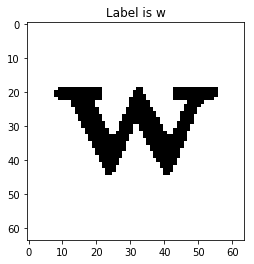

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


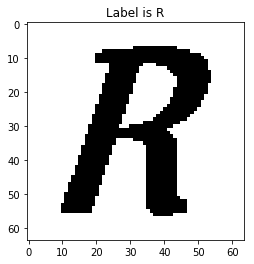

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


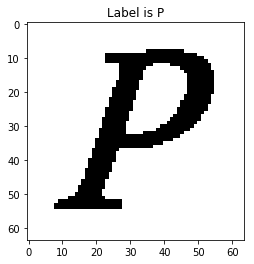

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


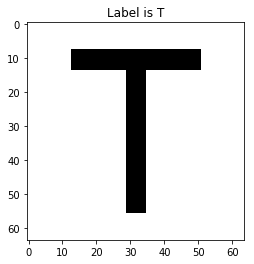

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


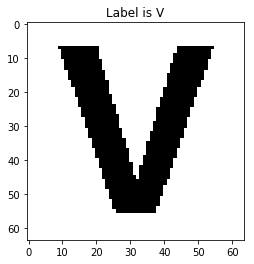

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


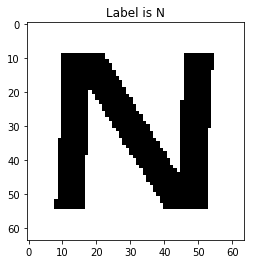

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


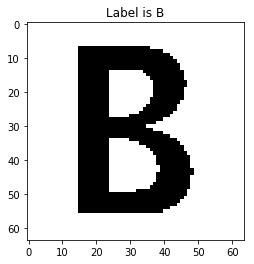

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


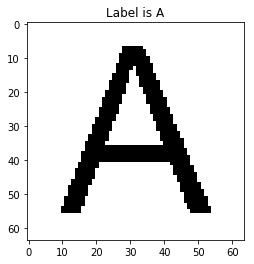

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


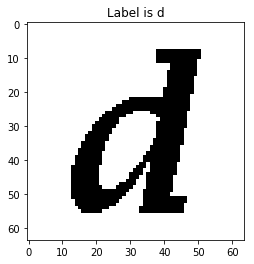

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


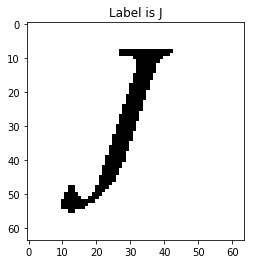

In [7]:
for i in range (10):
    char = dictionary[np.argmax(labels[i])]
    showImage(imgs[i],char)

# Load data x2

In [3]:
import cv2
from sklearn.utils import shuffle

def loadTrainImage(path):
        img = cv2.imread(path);
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = 255 - img
#         img = cv2.resize(img,(28,28))
        img = keras.utils.normalize(img, axis=1)
        return img
    
def loadTrainingSet():
    x_train = []
    y_train = []

    for i in range(1,63):
        folderName = "Sample"
        nrFolder = ""
        if i<=9:
            nrFolder = "00"+str(i)
        else:
            nrFolder = "0"+str(i)
        folderName = folderName + nrFolder   
        for j in range(1,1017):
            imageName = "";
            if j<=9:
                imageName = "img" + nrFolder + "-0000" + str(j)
            elif j<=99:
                imageName = "img" + nrFolder + "-000" + str(j)
            elif j<=999:
                imageName = "img" + nrFolder + "-00" + str(j)
            else:
                imageName = "img" + nrFolder + "-0" + str(j)

            image = loadTrainImage("./trainingSet/" + folderName + "/" + imageName + ".png")
            x_train.append(image)
            y_train.append(i-1)
        print("load '", dictionary[i-1],"' from ", folderName," ...")

    x_train = np.asarray(x_train)
    
    y_train = np.asarray(y_train)
    
    x_train,y_train = shuffle(x_train,y_train)
    
    y_train = to_categorical(y_train)
    
    return (x_train,y_train)

In [4]:
x_train, y_train = loadTrainingSet()

load ' 0 ' from  Sample001  ...
load ' 1 ' from  Sample002  ...
load ' 2 ' from  Sample003  ...
load ' 3 ' from  Sample004  ...
load ' 4 ' from  Sample005  ...
load ' 5 ' from  Sample006  ...
load ' 6 ' from  Sample007  ...
load ' 7 ' from  Sample008  ...
load ' 8 ' from  Sample009  ...
load ' 9 ' from  Sample010  ...
load ' A ' from  Sample011  ...
load ' B ' from  Sample012  ...
load ' C ' from  Sample013  ...
load ' D ' from  Sample014  ...
load ' E ' from  Sample015  ...
load ' F ' from  Sample016  ...
load ' G ' from  Sample017  ...
load ' H ' from  Sample018  ...
load ' I ' from  Sample019  ...
load ' J ' from  Sample020  ...
load ' K ' from  Sample021  ...
load ' L ' from  Sample022  ...
load ' M ' from  Sample023  ...
load ' N ' from  Sample024  ...
load ' O ' from  Sample025  ...
load ' P ' from  Sample026  ...
load ' Q ' from  Sample027  ...
load ' R ' from  Sample028  ...
load ' S ' from  Sample029  ...
load ' T ' from  Sample030  ...
load ' U ' from  Sample031  ...
load ' V

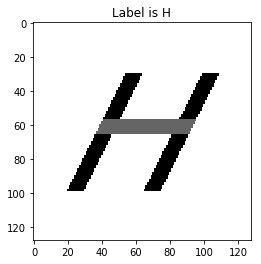

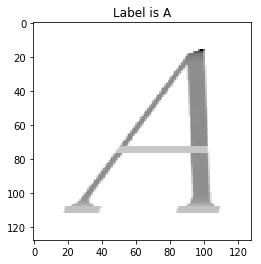

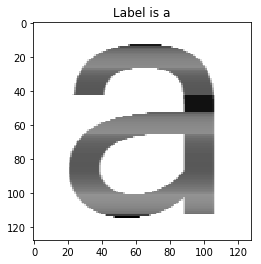

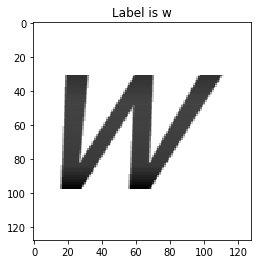

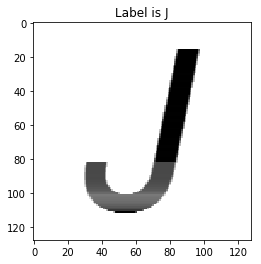

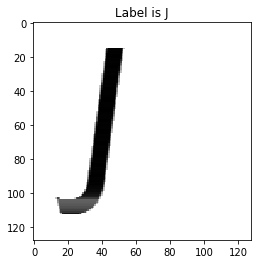

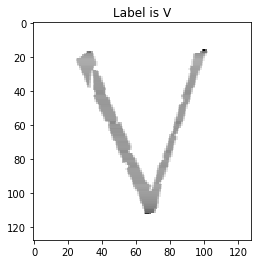

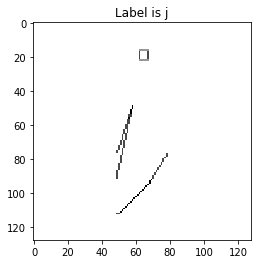

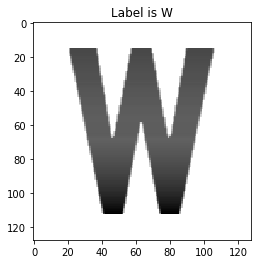

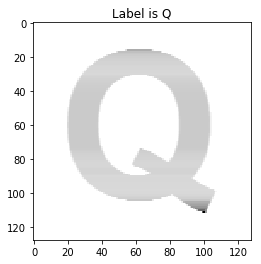

In [7]:
for i in range(10):
    ch = dictionary[np.argmax(y_train[i])]
    showImage(x_train[i],ch)

In [8]:
x_train = x_train.reshape(62992, 128, 128,1)

# CNN VGG16

In [63]:
# vgg16_model = keras.applications.vgg16.VGG16()
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)

In [64]:
input = Input(shape=(128,128,3),name = 'my_input')

In [65]:
for layer in model.layers:
    layer.trainable = False
output = model(input)

In [66]:
x = Flatten(name='flatten')(output)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(62, activation='softmax', name='predictions')(x)

In [67]:
my_model = Model(input=input, output=x)

c:\users\luci\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("my..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


In [68]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              33558528  
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 62)                254014    
Total params: 65,308,542
Trainable params: 50,593,854
Non-trainable params: 14,714,688
_______________________________________________________

In [69]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
# steps = nuamrul de poze in total / numarul de poze dintr-un batch
# model.fit_generator(trainBatches,steps_per_epoch=559,validation_data=validBatches,validation_steps=61,epochs=1,verbose=2)
model.fit(x_train,y_train,validation_split=0.1, batch_size=1000, epochs=2)

ValueError: Error when checking input: expected input_11 to have shape (None, None, 3) but got array with shape (128, 128, 1)

# CNN x2

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(62, activation='softmax'))
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 16)      4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                14764990  
Total params: 14,788,718
Trainable params: 14,788,718
Non-trainable params: 0
_________________________________________________________________


In [1]:
model.fit(x_train,y_train,validation_split=0.1, batch_size=1000, epochs=2)

NameError: name 'model' is not defined